# **LB_GeneralCase**

---

**Article Title:** Engineering Nonlinear Optical Activation Functions for All-Optical Neural Networks

**Authors:**  
- Xinzhe Xu\* (Purdue University)  
- Ruben Canora\* (Purdue University)  

\*Equal contribution  

**Advisors:** 
- Shengwang Du (Advisor, Purdue University)
- Hadiseh Alaeian (Advisor, Purdue University)  


**Date:** November 2024  
**License:** MIT License

---

## **Objective**

This notebook contains simulations and analysis for the research paper "Engineering Nonlinear Optical Activation Functions for All-Optical Neural Networks Based on Three-Level Atomic Ensemble." Specifically, this notebook focuses on modeling the behavior of Electromagnetically Induced Transparency (EIT) in three-level lifetime-broadened atomic, **considering incoherent ground-state pumping, strong beams, and propagation effects**. The input and output laser intensities of the two lasers are explored.

---

### Importing all necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

### Constants Definitions

In [11]:
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = mu_23 = 2.5377e-29      # Dipole moment between states (|1> and |3>) and (|1> and |3>) (C·m)

Gamma3 = 2 * np.pi * 6   # (GHz)
Gamma31 = 5/9 * Gamma3   # Decay from level 3 to level 1 (GHz)
Gamma32 = Gamma23 = 4/9 * Gamma3   # Decay from level 3 to level 2 (GHz)
Gamma12 = Gamma21 = 0.05 * Gamma3    # Decay rates between levels 1 and 2 (GHz)
gamma13 = (Gamma3 + Gamma12)/2  # Decoherence rate between levels 1 and 3 (GHz)
gamma23 = (Gamma3 + Gamma21)/2  # Decoherence rate between levels 2 and 3 (GHz)
gamma12 = (Gamma12 + Gamma21)/2     # Decoherence rate between ground states (GHz)

w_1 = 2 * np.pi * 3e8 / 795e-9
k_0 = w_1 / 3e8
L = 0.1        # Length in meters
z = 0.00001    # Step size in meters

OD_0 = 10
Gamma3_in_Hz = Gamma3 * 1e6

factor = ((4 * np.pi * mu_13**2 * L) / (Gamma3_in_Hz * hbar * epsilon_0 * 795e-9))
N = OD_0 / factor
# N = 3.46e16
# OD_01 = N1 * factor

print("{:.2e}".format(N))
# print("{:.2e}".format(N1))
# print("{:.2e}".format(OD_01))

3.46e+14


### Plotting output intensities vs. beam 2 input intensity

\[
A =
\begin{pmatrix}
\Gamma_{31} + \Gamma_{12} & 0 & \frac{i\Omega_1}{2} & 0 & \Gamma_{31} - \Gamma_{21} & 0 & -\frac{i\Omega_1^*}{2} & 0 \\
0 & \gamma_{12} - i(\delta_2 - \delta_1) & \frac{i\Omega_2}{2} & 0 & 0 & 0 & 0 & -\frac{i\Omega_1^*}{2} \\
i\Omega_1^* & \frac{i\Omega_2^*}{2} & \gamma_{13} + i\delta_1 & 0 & \frac{i\Omega_1^*}{2} & 0 & 0 & 0 \\
0 & 0 & 0 & \gamma_{12} + i(\delta_2 - \delta_1) & 0 & \frac{i\Omega_1}{2} & -\frac{i\Omega_2^*}{2} & 0 \\
\Gamma_{32} - \Gamma_{12} & 0 & 0 & 0 & \Gamma_{32} + \Gamma_{21} & \frac{i\Omega_2}{2} & 0 & -\frac{i\Omega_2^*}{2} \\
\frac{i\Omega_2^*}{2} & 0 & 0 & \frac{i\Omega_1^*}{2} & i\Omega_2^* & \gamma_{23} + i\delta_2 & 0 & 0 \\
-i\Omega_1 & 0 & 0 & -\frac{i\Omega_2}{2} & -\frac{i\Omega_1}{2} & 0 & \gamma_{13} - i\delta_1 & 0 \\
-\frac{i\Omega_2}{2} & -\frac{i\Omega_1}{2} & 0 & 0 & -i\Omega_2 & 0 & 0 & \gamma_{23} - i\delta_2
\end{pmatrix}
\]

\[
b =
\begin{pmatrix}
\Gamma_{31} \\
0 \\
\frac{i\Omega_1^*}{2} \\
0 \\
\Gamma_{32} \\
\frac{i\Omega_2^*}{2} \\
-\frac{i\Omega_1}{2} \\
-\frac{i\Omega_2}{2}
\end{pmatrix}
\]

\[
A \* v = b
\]


FloatSlider(value=3.0, description='$\\Omega_1$ (MHz)', layout=Layout(width='800px'), max=10.0, min=1e-06, ste…

FloatSlider(value=0.5, description='$\\Delta_1$ (MHz)', layout=Layout(width='800px'), max=1.5, min=-1.5, step=…

FloatSlider(value=0.0, description='$\\Delta_2$ (MHz)', layout=Layout(width='800px'), max=1.5, min=-1.5, step=…

Button(button_style='success', description='Run Simulation', icon='play', style=ButtonStyle(), tooltip='Click …

Processing z step 50/200
Processing z step 100/200
Processing z step 150/200


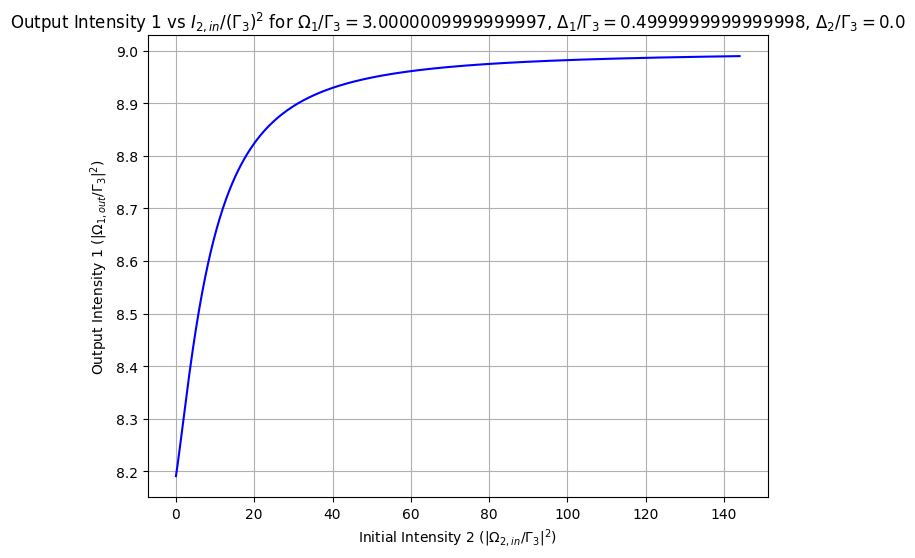

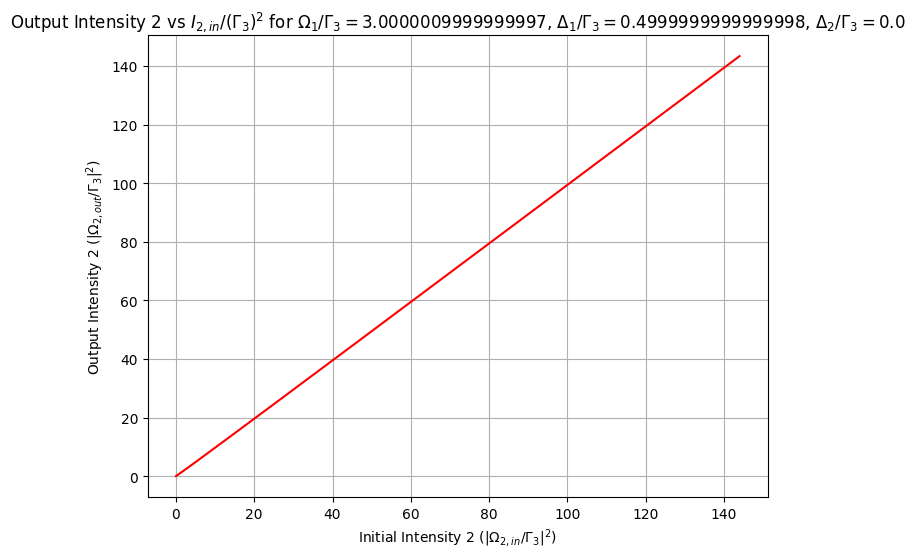

In [ ]:
Transparency_Omega_1 = None
Transparency_Omega_2 = None
Om_2_list_adapted = None

# Backend function to calculate OD based on user input
def calculate_OD_1(Om_1=1.0, delta_1=0.0, delta_2=0.0):
    n_rabi = 500
    Om_2_list_adapted = np.linspace(0.005, 12, n_rabi, dtype=complex)  # Coupling Rabi frequency range (dimensionless)
    Om_2_list = Om_2_list_adapted * Gamma3
    Om_1_list = np.full(n_rabi, Om_1 * Gamma3, dtype=complex)
    
    nz = int(L / z)  # Number of z steps
    z_array = np.arange(nz) * z  # Array of z values
    
    # Initialize arrays to store Rabi frequencies at each z step
    Om_2_vs_z = []
    Om_1_vs_z = []

    # Initialize arrays with zeros to store populations
    rho11_values = np.zeros((nz, n_rabi), dtype=float)
    rho22_values = np.zeros((nz, n_rabi), dtype=float)
    rho33_values = np.zeros((nz, n_rabi), dtype=float)
    
    # rho11_values[0, :] = 1.0
    # rho22_values[0, :] = 0.0
    # rho33_values[0, :] = 0.0

    # Initialize arrays to store rho31 and rho32
    rho31_values = np.zeros((nz, n_rabi), dtype=complex)
    rho32_values = np.zeros((nz, n_rabi), dtype=complex)

    for i in range(nz):
        if i == nz/4 or i == nz/2 or i == 3*nz/4: 
            print(f"Processing z step {i}/{nz}")
        
        for j in range(0, len(Om_2_list)):
            Om_2_actual = Om_2_list[j]      # Convert to actual Omega_2 in MHz
            Om_1_actual = Om_1_list[j]      # Convert Om_1 to MHz

            delta_1_actual = delta_1 * Gamma3 
            delta_2_actual = delta_2 * Gamma3

            # Construct A and b as per Code2
            # Define the imaginary unit
            I = 1j

            # Construct the matrix A
            A = np.array([
                # Row 1
                [Gamma31 + Gamma12, 0, I*Om_1_actual/2, 0, Gamma31 - Gamma21, 0, -I*np.conjugate(Om_1_actual)/2, 0],
                # Row 2
                [0, gamma12 - I*(delta_2_actual - delta_1_actual), I*Om_2_actual/2, 0, 0, 0, 0, -I*np.conjugate(Om_1_actual)/2],
                # Row 3
                [I*np.conjugate(Om_1_actual), I*np.conjugate(Om_2_actual)/2, gamma13 + I*delta_1_actual, 0, I*np.conjugate(Om_1_actual)/2, 0, 0, 0],
                # Row 4
                [0, 0, 0, gamma12 + I*(delta_2_actual - delta_1_actual), 0, I*Om_1_actual/2, -I*np.conjugate(Om_2_actual)/2, 0],
                # Row 5
                [Gamma32 - Gamma12, 0, 0, 0, Gamma32 + Gamma21, I*Om_2_actual/2, 0, -I*np.conjugate(Om_2_actual)/2],
                # Row 6
                [I*np.conjugate(Om_2_actual)/2, 0, 0, I*np.conjugate(Om_1_actual)/2, I*np.conjugate(Om_2_actual), gamma23 + I*delta_2_actual, 0, 0],
                # Row 7
                [-I*Om_1_actual, 0, 0, -I*Om_2_actual/2, -I*Om_1_actual/2, 0, gamma13 - I*delta_1_actual, 0],
                # Row 8
                [-I*Om_2_actual/2, -I*Om_1_actual/2, 0, 0, -I*Om_2_actual, 0, 0, gamma23 - I*delta_2_actual]
            ], dtype=complex)
            
            # Construct the vector b
            b = np.array([
                Gamma31,
                0,
                I*np.conjugate(Om_1_actual)/2,
                0,
                Gamma32,
                I*np.conjugate(Om_2_actual)/2,
                -I*Om_1_actual/2,
                -I*Om_2_actual/2
            ], dtype=complex)
            
            # Solve the linear system A * v = b
            try:
                v = np.linalg.solve(A, b)
            except np.linalg.LinAlgError:
                # Handle singular matrix
                print("nan")
                rho11_values[i][j] = np.nan
                rho22_values[i][j] = np.nan
                rho33_values[i][j] = np.nan
                rho31_values[i][j] = np.nan
                rho32_values[i][j] = np.nan
                continue

            # Extract the solutions
            rho11 = np.real(v[0])
            rho12 = v[1]
            rho13 = v[2]
            rho21 = v[3]
            rho22 = np.real(v[4])
            rho23 = v[5]
            rho31 = v[6]
            rho32 = v[7]

            # Compute rho33
            rho33 = 1 - rho11 - rho22

            # Store the populations
            rho11_values[i][j] = np.real(rho11)
            rho22_values[i][j] = np.real(rho22)
            rho33_values[i][j] = np.real(rho33)
            rho31_values[i][j] = rho31
            rho32_values[i][j] = rho32
            

            # Update the Rabi frequencies
            Om_2_list[j] = Om_2_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho32 * mu_23**2 / 1e6
            Om_1_list[j] = Om_1_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho31 * mu_13**2 / 1e6

        # Record Rabi frequencies at this z step
        Om_2_vs_z.append(Om_2_list.copy())
        Om_1_vs_z.append(Om_1_list.copy())
    
    # Convert lists to numpy arrays
    Om_2_vs_z = np.array(Om_2_vs_z)  # Shape: (nz, n_rabi)
    Om_1_vs_z = np.array(Om_1_vs_z)
    
    return Om_2_list_adapted, Om_2_list, Om_1_list, rho11_values, rho22_values, rho33_values, rho31_values, rho32_values, Om_2_vs_z, Om_1_vs_z, z_array

def plot_OD(Om_1, delta_1, delta_2):
    global Transparency_Omega_1, Transparency_Omega_2, Om_2_list_adapted
    Om_2_list_adapted, Om_2_list, Om_1_list, rho11_values, rho22_values, rho33_values, rho31_values, rho32_values, Om_2_vs_z, Om_1_vs_z, z_array = calculate_OD_1(Om_1, delta_1, delta_2)
   
    Om_2_vs_z_dimensionless = Om_2_vs_z / Gamma3
    Om_1_vs_z_dimensionless = Om_1_vs_z / Gamma3
    
    # Compute transparency for Omega_1 and Omega_2
    Transparency_Omega_1 = np.abs(Om_1_vs_z[-1, :])**2 / np.abs(Om_1_vs_z[0, :])**2
    Transparency_Omega_2 = np.abs(Om_2_vs_z[-1, :])**2 / np.abs(Om_2_vs_z[0, :])**2

    # Calculate output intensity based on transparency and initial input power
    Output_Intensity_Omega_1 = Transparency_Omega_1 * np.abs(Om_1_vs_z[0, :])**2 / (Gamma3**2)
    Output_Intensity_Omega_2 = Transparency_Omega_2 * np.abs(Om_2_vs_z[0, :])**2 / (Gamma3**2)
    
    # Plot Output Intensity of Omega_1 vs Initial Omega_2
    plt.figure(figsize=(8, 6))
    plt.plot(np.real(Om_2_list_adapted)**2, Output_Intensity_Omega_1, color='blue', label='Output Intensity $\Omega_1$')
    plt.xlabel('Initial Intensity 2 ($|\\Omega_{2,in} / \\Gamma_3|^2$)')
    plt.ylabel('Output Intensity 1 ($|\\Omega_{1,out} / \\Gamma_3|^2$)')
    plt.title(f'Output Intensity 1 vs $I_{{2,\t{{in}}}} / (\\Gamma_3)^2$ for 'f'$\\Omega_1/\\Gamma_3={Om_1}$, 'f'$\\Delta_1/\\Gamma_3={delta_1}$, 'f'$\\Delta_2/\\Gamma_3={delta_2}$')
    plt.grid(True)
    plt.show()

    # Plot Output Intensity of Omega_2 vs Initial Omega_2
    plt.figure(figsize=(8, 6))
    plt.plot(np.real(Om_2_list_adapted)**2, Output_Intensity_Omega_2, color='red', label='Output Intensity $\Omega_2$')
    plt.xlabel('Initial Intensity 2 ($|\\Omega_{2,in} / \\Gamma_3|^2$)')
    plt.ylabel('Output Intensity 2 ($|\\Omega_{2,out} / \\Gamma_3|^2$)')
    plt.title(f'Output Intensity 2 vs $I_{{2,\t{{in}}}} / (\\Gamma_3)^2$ for 'f'$\\Omega_1/\\Gamma_3={Om_1}$, 'f'$\\Delta_1/\\Gamma_3={delta_1}$, 'f'$\\Delta_2/\\Gamma_3={delta_2}$')
    plt.grid(True)
    plt.show()

# Adjust slider description width specifically
slider_layout = widgets.Layout(width='800px')  # Adjust slider width if needed
description_layout = widgets.Layout(width='150px')  # Adjust description width

# Interactive sliders for Om_1, delta_1, delta_2 with wider description layout
Om_1_slider = widgets.FloatSlider(
    value=3, min=0.000001, max=10.0, step=0.01,
    description='$\Omega_1$ (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # This sets description width
)

delta_1_slider = widgets.FloatSlider(
    value=0.50, min=-1.5, max=1.5, step=0.01,
    description='$\Delta_1$ (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

delta_2_slider = widgets.FloatSlider(
    value=0.0, min=-1.5, max=1.5, step=0.01,
    description='$\Delta_2$ (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

# Create the button to start the simulation
run_button = widgets.Button(
    description="Run Simulation",
    button_style='success',  # 'success', 'info', 'warning', 'danger' or '' (default)
    tooltip='Click to run the simulation',
    icon='play'
)

# Function to be triggered when the button is clicked
def run_simulation(b):
    # Extract the current slider values
    Om_1 = Om_1_slider.value
    delta_1 = delta_1_slider.value
    delta_2 = delta_2_slider.value
    
    # Call the plot_OD function with these values
    plot_OD(Om_1, delta_1, delta_2)

# Attach the function to the button
run_button.on_click(run_simulation)

# Display the sliders and the button
display(Om_1_slider, delta_1_slider, delta_2_slider, run_button)


### Plotting output intensities vs. beam 1 input intensity

In [ ]:
Transparency_Omega_1 = None
Transparency_Omega_2 = None
Om_1_list_adapted = None

# Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = 1.932e-29      # Dipole moment between states |1> and |3> (C·m)
N = 3.5e10                # Atomic number density for cold atoms

Gamma3 = 2 * np.pi * 6   # (MHz)
Gamma31 = 5/9 * Gamma3   # Decay from level 3 to level 1 (MHz)
Gamma32 = 4/9 * Gamma3   # Decay from level 3 to level 2 (MHz)
Gamma12 = Gamma21 = 0    # Decay rates between levels 1 and 2 (MHz)
gamma13 = (Gamma3 + Gamma12)/2  # Decoherence rate between levels 1 and 3 (MHz)
gamma23 = (Gamma3 + Gamma21)/2  # Decoherence rate between levels 2 and 3 (MHz)
gamma12 = 0.001 * Gamma3        # Decoherence rate between ground states (MHz)

w_p = 2 * np.pi * 3e8 / 795e-9
k_0 = w_p / 3e8
L = 0.1

# Backend function to calculate OD based on user input
def calculate_OD_2(Om_2=1.0, delta_1=0.0, delta_2=0.0):
    n_rabi = 500
    Om_1_list_adapted = np.linspace(0.005, 12, n_rabi, dtype=complex)  # Probe Rabi frequency range (dimensionless)
    Om_1_list = Om_1_list_adapted * Gamma3
    Om_2_list = np.full(n_rabi, Om_2 * Gamma3, dtype=complex)
    
    nz = int(L / z)  # Number of z steps
    z_array = np.arange(nz) * z  # Array of z values
    
    # Initialize arrays to store Rabi frequencies at each z step
    Om_1_vs_z = []
    Om_2_vs_z = []
    
    # Initialize arrays with zeros to store populations
    rho11_values = np.zeros((nz, n_rabi), dtype=float)
    rho22_values = np.zeros((nz, n_rabi), dtype=float)
    rho33_values = np.zeros((nz, n_rabi), dtype=float)
    
    # rho11_values[0, :] = 1.0
    # rho22_values[0, :] = 0.0
    # rho33_values[0, :] = 0.0

    # Initialize arrays to store rho31 and rho32
    rho31_values = np.zeros((nz, n_rabi), dtype=complex)
    rho32_values = np.zeros((nz, n_rabi), dtype=complex)
    
    for i in range(nz):
        if i == nz/4 or i == nz/2 or i == 3*nz/4: 
            print(f"Processing z step {i}/{nz}")
        
        for j in range(0, len(Om_1_list)):
            Om_1_actual = Om_1_list[j]      # Convert to actual Omega_1 in MHz
            Om_2_actual = Om_2_list[j]      # Convert Om_2 to MHz

            delta_1_actual = delta_1 * Gamma3
            delta_2_actual = delta_2 * Gamma3

            # Construct A and b as per Code2
            # Define the imaginary unit
            I = 1j

            # Construct the matrix A
            A = np.array([
                # Row 1
                [Gamma31 + Gamma12, 0, I*Om_1_actual/2, 0, Gamma31 - Gamma21, 0, -I*np.conjugate(Om_1_actual)/2, 0],
                # Row 2
                [0, gamma12 - I*(delta_2_actual - delta_1_actual), I*Om_2_actual/2, 0, 0, 0, 0, -I*np.conjugate(Om_1_actual)/2],
                # Row 3
                [I*np.conjugate(Om_1_actual), I*np.conjugate(Om_2_actual)/2, gamma13 + I*delta_1_actual, 0, I*np.conjugate(Om_1_actual)/2, 0, 0, 0],
                # Row 4
                [0, 0, 0, gamma12 + I*(delta_2_actual - delta_1_actual), 0, I*Om_1_actual/2, -I*np.conjugate(Om_2_actual)/2, 0],
                # Row 5
                [Gamma32 - Gamma12, 0, 0, 0, Gamma32 + Gamma21, I*Om_2_actual/2, 0, -I*np.conjugate(Om_2_actual)/2],
                # Row 6
                [I*np.conjugate(Om_2_actual)/2, 0, 0, I*np.conjugate(Om_1_actual)/2, I*np.conjugate(Om_2_actual), gamma23 + I*delta_2_actual, 0, 0],
                # Row 7
                [-I*Om_1_actual, 0, 0, -I*Om_2_actual/2, -I*Om_1_actual/2, 0, gamma13 - I*delta_1_actual, 0],
                # Row 8
                [-I*Om_2_actual/2, -I*Om_1_actual/2, 0, 0, -I*Om_2_actual, 0, 0, gamma23 - I*delta_2_actual]
            ], dtype=complex)
            
            # Construct the vector b
            b = np.array([
                Gamma31,
                0,
                I*np.conjugate(Om_1_actual)/2,
                0,
                Gamma32,
                I*np.conjugate(Om_2_actual)/2,
                -I*Om_1_actual/2,
                -I*Om_2_actual/2
            ], dtype=complex)

            # Solve the linear system A * v = b
            try:
                v = np.linalg.solve(A, b)
            except np.linalg.LinAlgError:
                # Handle singular matrix
                print("nan")
                rho11_values[i][j] = np.nan
                rho22_values[i][j] = np.nan
                rho33_values[i][j] = np.nan
                rho31_values[i][j] = np.nan
                rho32_values[i][j] = np.nan
                continue

            # Extract the solutions
            rho11 = np.real(v[0])
            rho12 = v[1]
            rho13 = v[2]
            rho21 = v[3]
            rho22 = np.real(v[4])
            rho23 = v[5]
            rho31 = v[6]
            rho32 = v[7]

            # Compute rho33
            rho33 = 1 - rho11 - rho22

            # Store the populations
            rho11_values[i][j] = np.real(rho11)
            rho22_values[i][j] = np.real(rho22)
            rho33_values[i][j] = np.real(rho33)
            rho31_values[i][j] = rho31
            rho32_values[i][j] = rho32

            # Update the Rabi frequencies
            Om_1_list[j] = Om_1_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho31 * mu_13**2
            Om_2_list[j] = Om_2_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho32 * mu_23**2

        # Record Rabi frequencies at this z step
        Om_1_vs_z.append(Om_1_list.copy())
        Om_2_vs_z.append(Om_2_list.copy())
    
    # Convert lists to numpy arrays
    Om_1_vs_z = np.array(Om_1_vs_z)  # Shape: (nz, n_rabi)
    Om_2_vs_z = np.array(Om_2_vs_z)
    
    return Om_1_list_adapted, Om_1_list, Om_2_list, rho11_values, rho22_values, rho33_values, rho31_values, rho32_values, Om_1_vs_z, Om_2_vs_z, z_array

def plot_OD(Om_2, delta_1, delta_2):
    global Transparency_Omega_1, Transparency_Omega_2, Om_1_list_adapted
    Om_1_list_adapted, Om_1_list, Om_2_list, rho11_values, rho22_values, rho33_values, rho31_values, rho32_values, Om_1_vs_z, Om_2_vs_z, z_array = calculate_OD_2(Om_2, delta_1, delta_2)
   
    Om_1_vs_z_dimensionless = Om_1_vs_z / Gamma3
    Om_2_vs_z_dimensionless = Om_2_vs_z / Gamma3
    
    # Compute transparency for Omega_1 and Omega_2
    Transparency_Omega_1 = np.abs(Om_1_vs_z[-1, :])**2 / np.abs(Om_1_vs_z[0, :])**2
    Transparency_Omega_2 = np.abs(Om_2_vs_z[-1, :])**2 / np.abs(Om_2_vs_z[0, :])**2

    # Calculate output intensity based on transparency and initial input power
    Output_Intensity_Omega_1 = Transparency_Omega_1 * np.abs(Om_1_vs_z[0, :])**2 / (Gamma3**2)
    Output_Intensity_Omega_2 = Transparency_Omega_2 * np.abs(Om_2_vs_z[0, :])**2 / (Gamma3**2)
    
    # Plot Output Intensity of Omega_1 vs Initial Omega_1
    plt.figure(figsize=(8, 6))
    plt.plot(np.real(Om_1_list_adapted)**2, Output_Intensity_Omega_1, color='blue', label='Output Intensity $\Omega_1$')
    plt.xlabel('Initial Intensity 1 ($|\\Omega_{1,in} / \\Gamma_3|^2$)')
    plt.ylabel('Output Intensity 1 ($|\\Omega_{1,out} / \\Gamma_3|^2$)')
    plt.title(f'Output Intensity 1 vs $I_{{1,\t{{in}}}} / (\\Gamma_3)^2$ for 'f'$\\Omega_2/\\Gamma_3={Om_2}$, 'f'$\\Delta_1/\\Gamma_3={delta_1}$, 'f'$\\Delta_2/\\Gamma_3={delta_2}$')
    plt.grid(True)
    plt.show()

    # Plot Output Intensity of Omega_2 vs Initial Omega_1
    plt.figure(figsize=(8, 6))
    plt.plot(np.real(Om_1_list_adapted)**2, Output_Intensity_Omega_2, color='red', label='Output Intensity $\Omega_2$')
    plt.xlabel('Initial Intensity 1 ($|\\Omega_{1,in} / \\Gamma_3|^2$)')
    plt.ylabel('Output Intensity 2 ($|\\Omega_{2,out} / \\Gamma_3|^2$)')
    plt.title(f'Output Intensity 2 vs $I_{{1,\t{{in}}}} / (\\Gamma_3)^2$ for 'f'$\\Omega_2/\\Gamma_3={Om_2}$, 'f'$\\Delta_1/\\Gamma_3={delta_1}$, 'f'$\\Delta_2/\\Gamma_3={delta_2}$')
    plt.grid(True)
    plt.show()

# Adjust slider description width specifically
slider_layout = widgets.Layout(width='800px')  # Adjust slider width if needed
description_layout = widgets.Layout(width='150px')  # Adjust description width

# Interactive sliders for Om_2, delta_1, delta_2 with wider description layout
Om_2_slider = widgets.FloatSlider(
    value=3, min=0.000001, max=10.0, step=0.01,
    description='$\Omega_2$ (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # This sets description width
)

delta_1_slider = widgets.FloatSlider(
    value=0.50, min=-1.5, max=1.5, step=0.01,
    description='$\Delta_1$ (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

delta_2_slider = widgets.FloatSlider(
    value=0.0, min=-1.5, max=1.5, step=0.01,
    description='$\Delta_2$ (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

# Create the button to start the simulation
run_button = widgets.Button(
    description="Run Simulation",
    button_style='success',  # 'success', 'info', 'warning', 'danger' or '' (default)
    tooltip='Click to run the simulation',
    icon='play'
)

# Function to be triggered when the button is clicked
def run_simulation(b):
    # Extract the current slider values
    Om_2 = Om_2_slider.value
    delta_1 = delta_1_slider.value
    delta_2 = delta_2_slider.value
    
    # Call the plot_OD function with these values
    plot_OD(Om_2, delta_1, delta_2)

# Attach the function to the button
run_button.on_click(run_simulation)

# Display the sliders and the button
display(Om_2_slider, delta_1_slider, delta_2_slider, run_button)

### Transparency vs. Detuning GiF Animation

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, Image
import ipywidgets as widgets

# Modified function to calculate OD based on varying delta_1 and Omega_2
def calculate_OD_delta_Om2(Om_1=1.0, Om_2_values=[1.0], delta_2=0.0):
    n_detuning = 500
    delta_1_min = -10.0
    delta_1_max = 10.0
    delta_1_list = np.linspace(delta_1_min, delta_1_max, n_detuning)
    delta_1_list_actual = delta_1_list * Gamma3

    delta_2_actual = delta_2 * Gamma3

    nz = int(L / z)
    z_array = np.arange(nz) * z

    results = []

    for Om_2 in Om_2_values:
        Om_1_actual_initial = Om_1 * Gamma3
        Om_2_actual_initial = Om_2 * Gamma3

        # Initialize arrays with Om_1 and Om_2 values
        Om_1_list = np.full(n_detuning, Om_1_actual_initial, dtype=complex)
        Om_2_list = np.full(n_detuning, Om_2_actual_initial, dtype=complex)

        # Initialize arrays to store populations
        rho11_values = np.zeros((nz, n_detuning), dtype=float)
        rho22_values = np.zeros((nz, n_detuning), dtype=float)
        rho33_values = np.zeros((nz, n_detuning), dtype=float)

        # Initialize arrays to store rho31 and rho32
        rho31_values = np.zeros((nz, n_detuning), dtype=complex)
        rho32_values = np.zeros((nz, n_detuning), dtype=complex)

        for i in range(nz):
            if i == nz//4 or i == nz//2 or i == 3*nz//4: 
                print(f"Processing z step {i}/{nz}") 
            
            for j in range(n_detuning): 
                delta_1_actual = delta_1_list_actual[j] 

                Om_1_actual = Om_1_list[j]      # Om_1_actual at previous z step 
                Om_2_actual = Om_2_list[j]      # Om_2_actual at previous z step 

                # Define the imaginary unit 
                I = 1j 

                # Construct the matrix A 
                A = np.array([ 
                    # Row 1 
                    [Gamma31 + Gamma12, 0, I*Om_1_actual/2, 0, Gamma31 - Gamma21, 0, -I*np.conjugate(Om_1_actual)/2, 0], 
                    # Row 2
                    [0, gamma12 - I*(delta_2_actual - delta_1_actual), I*Om_2_actual/2, 0, 0, 0, 0, -I*np.conjugate(Om_1_actual)/2],
                    # Row 3
                    [I*np.conjugate(Om_1_actual), I*np.conjugate(Om_2_actual)/2, gamma13 + I*delta_1_actual, 0, I*np.conjugate(Om_1_actual)/2, 0, 0, 0],
                    # Row 4
                    [0, 0, 0, gamma12 + I*(delta_2_actual - delta_1_actual), 0, I*Om_1_actual/2, -I*np.conjugate(Om_2_actual)/2, 0],
                    # Row 5
                    [Gamma32 - Gamma12, 0, 0, 0, Gamma32 + Gamma21, I*Om_2_actual/2, 0, -I*np.conjugate(Om_2_actual)/2],
                    # Row 6
                    [I*np.conjugate(Om_2_actual)/2, 0, 0, I*np.conjugate(Om_1_actual)/2, I*np.conjugate(Om_2_actual), gamma23 + I*delta_2_actual, 0, 0],
                    # Row 7
                    [-I*Om_1_actual, 0, 0, -I*Om_2_actual/2, -I*Om_1_actual/2, 0, gamma13 - I*delta_1_actual, 0],
                    # Row 8
                    [-I*Om_2_actual/2, -I*Om_1_actual/2, 0, 0, -I*Om_2_actual, 0, 0, gamma23 - I*delta_2_actual]
                ], dtype=complex)
                
                # Construct the vector b
                b = np.array([
                    Gamma31,
                    0,
                    I*np.conjugate(Om_1_actual)/2,
                    0,
                    Gamma32,
                    I*np.conjugate(Om_2_actual)/2,
                    -I*Om_1_actual/2,
                    -I*Om_2_actual/2
                ], dtype=complex)
                
                # Solve the linear system A * v = b
                try:
                    v = np.linalg.solve(A, b)
                except np.linalg.LinAlgError:
                    # Handle singular matrix
                    rho11_values[i][j] = np.nan
                    rho22_values[i][j] = np.nan
                    rho33_values[i][j] = np.nan
                    rho31_values[i][j] = np.nan
                    rho32_values[i][j] = np.nan
                    continue

                # Extract the solutions
                rho11 = np.real(v[0])
                rho12 = v[1]
                rho13 = v[2]
                rho21 = v[3]
                rho22 = np.real(v[4])
                rho23 = v[5]
                rho31 = v[6]
                rho32 = v[7]

                # Compute rho33
                rho33 = 1 - rho11 - rho22

                # Store the populations
                rho11_values[i][j] = np.real(rho11)
                rho22_values[i][j] = np.real(rho22)
                rho33_values[i][j] = np.real(rho33)
                rho31_values[i][j] = rho31
                rho32_values[i][j] = rho32

                # Update the Rabi frequencies due to propagation
                Om_1_list[j] = Om_1_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho31 * mu_13**2 / 1e6
                Om_2_list[j] = Om_2_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho32 * mu_23**2 / 1e6

        # After propagation, calculate transparency
        Transparency_Omega_1 = np.abs(Om_1_list)**2 / np.abs(Om_1_actual_initial)**2
        Output_Intensity_Omega_1 = Transparency_Omega_1 * np.abs(Om_1_actual_initial)**2 / (Gamma3**2)

        results.append({
            'Om_2': Om_2,
            'delta_1_list': delta_1_list,
            'Output_Intensity_Omega_1': Output_Intensity_Omega_1
        })

    return results

def animate_EIT(Om_1, Om_2_values, delta_2):
    results = calculate_OD_delta_Om2(Om_1, Om_2_values, delta_2)

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    line, = ax.plot([], [], color='blue')
    ax.set_xlabel('$\Delta_1 / \Gamma_3$')
    ax.set_ylabel('Output Intensity 1 ($|\\Omega_{1,out} / \\Gamma_3|^2$)')
    ax.set_title('EIT Curve for Different $\Omega_2$ Values')
    ax.grid(True)

    # Set axis limits
    delta_1_min = results[0]['delta_1_list'][0]
    delta_1_max = results[0]['delta_1_list'][-1]
    ax.set_xlim(delta_1_min, delta_1_max)
    ax.set_ylim(0, None)  # Auto-adjust y-axis

    # Annotation for Omega_2 value
    text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

    def init():
        line.set_data([], [])
        text.set_text('')
        return line, text

    def animate(i):
        data = results[i]
        delta_1_list = data['delta_1_list']
        Output_Intensity_Omega_1 = data['Output_Intensity_Omega_1']
        line.set_data(delta_1_list, Output_Intensity_Omega_1)
        ax.set_ylim(0, np.max(Output_Intensity_Omega_1)*1.1)
        text.set_text(f'$\Omega_2 / \Gamma_3$ = {data["Om_2"]:.2f}')
        return line, text

    ani = animation.FuncAnimation(fig, animate, frames=len(results), init_func=init,
                                  blit=True, interval=500, repeat=False)

    # Save the animation as a GIF
    from matplotlib.animation import PillowWriter
    writer = PillowWriter(fps=2)
    ani.save('EIT_animation.gif', writer=writer)
    print("Animation saved as EIT_animation.gif")

    plt.close(fig)  # Close the figure to prevent duplicate display

    # Display the GIF inline
    display(Image(url='EIT_animation.gif'))

# Adjust slider description width specifically
slider_layout = widgets.Layout(width='800px')  # Adjust slider width if needed

# Interactive sliders for Om_1 and delta_2 with wider description layout
Om_1_slider = widgets.FloatSlider(
    value=1.0, min=0.1, max=10.0, step=0.1,
    description='$\Omega_1 / \Gamma_3$', layout=slider_layout,
    style={'description_width': '150px'}  # This sets description width
)

delta_2_slider = widgets.FloatSlider(
    value=0.0, min=-2.0, max=2.0, step=0.1,
    description='$\Delta_2 / \Gamma_3$', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

# Omega_2 values to scan
Om_2_min = 0.1
Om_2_max = 12.0
n_Om_2 = 10  # Number of Omega_2 values
Om_2_values = np.linspace(Om_2_min, Om_2_max, n_Om_2)

# Create the button to start the simulation
run_button = widgets.Button(
    description="Generate GIF",
    button_style='success',  # 'success', 'info', 'warning', 'danger' or '' (default)
    tooltip='Click to generate the GIF',
    icon='play'
)

# Function to be triggered when the button is clicked
def run_simulation(b):
    # Extract the current slider values
    Om_1 = Om_1_slider.value
    delta_2 = delta_2_slider.value

    # Call the animate_EIT function with these values
    animate_EIT(Om_1, Om_2_values, delta_2)

# Attach the function to the button
run_button.on_click(run_simulation)

# Display the sliders and the button
display(Om_1_slider, delta_2_slider, run_button)


FloatSlider(value=1.0, description='$\\Omega_1 / \\Gamma_3$', layout=Layout(width='800px'), max=10.0, min=0.1,…

FloatSlider(value=0.0, description='$\\Delta_2 / \\Gamma_3$', layout=Layout(width='800px'), max=2.0, min=-2.0,…

Button(button_style='success', description='Generate GIF', icon='play', style=ButtonStyle(), tooltip='Click to…

Processing z step 2500/10000
Processing z step 5000/10000
Processing z step 7500/10000
Processing z step 2500/10000
Processing z step 5000/10000
Processing z step 7500/10000
Processing z step 2500/10000
Processing z step 5000/10000
Processing z step 7500/10000
Processing z step 2500/10000
Processing z step 5000/10000
Processing z step 7500/10000
Processing z step 2500/10000
Processing z step 5000/10000
Processing z step 7500/10000
Processing z step 2500/10000
Processing z step 5000/10000
Processing z step 7500/10000
Processing z step 2500/10000
Processing z step 5000/10000
Processing z step 7500/10000


Optical Depth: 34561131507245.477
Optical Depth: 345611315072454.75
Optical Depth: 3456113150724547.5
Optical Depth: 3.4561131507245476e+16


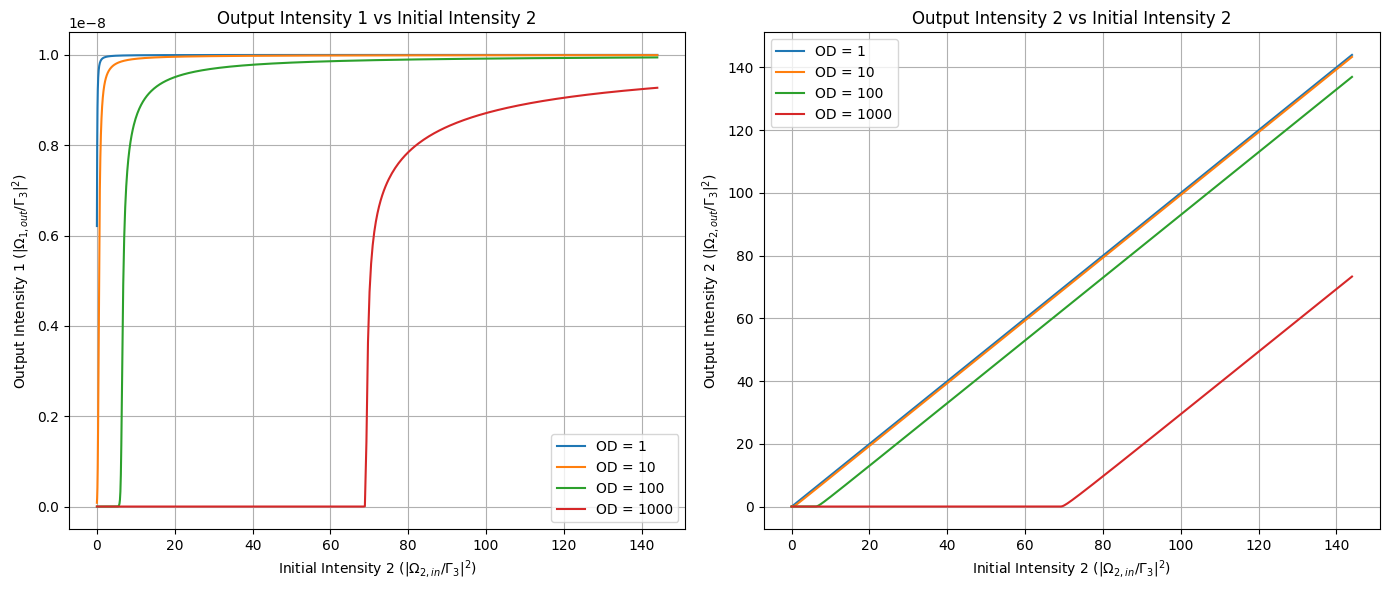

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = mu_23 = 2.5377e-29  # Dipole moment (C·m)

Gamma3 = 2 * np.pi * 6   # Decay rate from level 3 (MHz)
Gamma31 = 5 / 9 * Gamma3   # Decay from level 3 to level 1 (MHz)
Gamma32 = Gamma23 = 4 / 9 * Gamma3   # Decay from level 3 to level 2 (MHz)
Gamma12 = Gamma21 = 0.05 * Gamma3    # Decay rates between levels 1 and 2 (MHz)
gamma13 = (Gamma3 + Gamma12) / 2  # Decoherence rate between levels 1 and 3 (MHz)
gamma23 = (Gamma3 + Gamma21) / 2  # Decoherence rate between levels 2 and 3 (MHz)
gamma12 = (Gamma12 + Gamma21) / 2  # Decoherence rate between ground states (MHz)

w_1 = 2 * np.pi * 3e8 / 795e-9  # Angular frequency (rad/s)
k_0 = w_1 / 3e8  # Wave vector (m^-1)
L = 0.1          # Medium length (m)
z = 0.0005       # Step size in meters


# Function to calculate optical depth and EIT behavior
def calculate_OD_1(Om_1=1.0, delta_1=0.0, delta_2=0.0, OD_0=10):
    Gamma3_in_Hz = Gamma3 * 1e6
    factor = ((4 * np.pi * mu_13**2 * L) / (Gamma3_in_Hz * hbar * epsilon_0 * 795e-9))
    N = OD_0 / factor

    print (f"Optical Depth: {N}")

    n_rabi = 500
    Om_2_list_adapted = np.linspace(0.005, 12, n_rabi, dtype=complex)  # Coupling Rabi frequency range (dimensionless)
    Om_2_list = Om_2_list_adapted * Gamma3
    Om_1_list = np.full(n_rabi, Om_1 * Gamma3, dtype=complex)

    nz = int(L / z)  # Number of z steps
    z_array = np.arange(nz) * z  # Array of z values

    # Initialize arrays to store populations
    rho11_values = np.zeros((nz, n_rabi), dtype=float)
    rho22_values = np.zeros((nz, n_rabi), dtype=float)
    rho33_values = np.zeros((nz, n_rabi), dtype=float)
    rho31_values = np.zeros((nz, n_rabi), dtype=complex)
    rho32_values = np.zeros((nz, n_rabi), dtype=complex)

    for i in range(nz):
        for j in range(len(Om_2_list)):
            Om_2_actual = Om_2_list[j]
            Om_1_actual = Om_1_list[j]
            delta_1_actual = delta_1 * Gamma3
            delta_2_actual = delta_2 * Gamma3

            I = 1j
            # Construct the matrix A
            A = np.array([
                # Row 1
                [Gamma31 + Gamma12, 0, I*Om_1_actual/2, 0, Gamma31 - Gamma21, 0, -I*np.conjugate(Om_1_actual)/2, 0],
                # Row 2
                [0, gamma12 - I*(delta_2_actual - delta_1_actual), I*Om_2_actual/2, 0, 0, 0, 0, -I*np.conjugate(Om_1_actual)/2],
                # Row 3
                [I*np.conjugate(Om_1_actual), I*np.conjugate(Om_2_actual)/2, gamma13 + I*delta_1_actual, 0, I*np.conjugate(Om_1_actual)/2, 0, 0, 0],
                # Row 4
                [0, 0, 0, gamma12 + I*(delta_2_actual - delta_1_actual), 0, I*Om_1_actual/2, -I*np.conjugate(Om_2_actual)/2, 0],
                # Row 5
                [Gamma32 - Gamma12, 0, 0, 0, Gamma32 + Gamma21, I*Om_2_actual/2, 0, -I*np.conjugate(Om_2_actual)/2],
                # Row 6
                [I*np.conjugate(Om_2_actual)/2, 0, 0, I*np.conjugate(Om_1_actual)/2, I*np.conjugate(Om_2_actual), gamma23 + I*delta_2_actual, 0, 0],
                # Row 7
                [-I*Om_1_actual, 0, 0, -I*Om_2_actual/2, -I*Om_1_actual/2, 0, gamma13 - I*delta_1_actual, 0],
                # Row 8
                [-I*Om_2_actual/2, -I*Om_1_actual/2, 0, 0, -I*Om_2_actual, 0, 0, gamma23 - I*delta_2_actual]
            ], dtype=complex)
            
            # Construct the vector b
            b = np.array([
                Gamma31,
                0,
                I*np.conjugate(Om_1_actual)/2,
                0,
                Gamma32,
                I*np.conjugate(Om_2_actual)/2,
                -I*Om_1_actual/2,
                -I*Om_2_actual/2
            ], dtype=complex)

            try:
                v = np.linalg.solve(A, b)
            except np.linalg.LinAlgError:
                rho11_values[i][j] = np.nan
                rho22_values[i][j] = np.nan
                rho33_values[i][j] = np.nan
                rho31_values[i][j] = np.nan
                rho32_values[i][j] = np.nan
                continue

            # Extract the solutions
            rho11 = np.real(v[0])
            rho12 = v[1]
            rho13 = v[2]
            rho21 = v[3]
            rho22 = np.real(v[4])
            rho23 = v[5]
            rho31 = v[6]
            rho32 = v[7]

            # Compute rho33
            rho33 = 1 - rho11 - rho22

            # Store the populations
            rho11_values[i][j] = np.real(rho11)
            rho22_values[i][j] = np.real(rho22)
            rho33_values[i][j] = np.real(rho33)
            rho31_values[i][j] = rho31
            rho32_values[i][j] = rho32
            

            # Update the Rabi frequencies
            Om_2_list[j] = Om_2_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho32 * mu_23**2 * 1e-6
            Om_1_list[j] = Om_1_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho31 * mu_13**2 * 1e-6

    return Om_2_list_adapted, Om_2_list, Om_1_list


def plot_results_with_OD_sweep(Om_1, delta_1, delta_2, OD_values):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    for OD_0 in OD_values:
        Om_2_list_adapted, Om_2_list, Om_1_list = calculate_OD_1(Om_1, delta_1, delta_2, OD_0)

        Transparency_Omega_1 = np.abs(Om_1_list)**2 / np.abs(Om_1_list[0])**2
        Transparency_Omega_2 = np.abs(Om_2_list)**2 / np.abs(Om_2_list[0])**2

        Output_Intensity_Omega_1 = Transparency_Omega_1 * np.abs(Om_1_list[0])**2 / (Gamma3**2)
        Output_Intensity_Omega_2 = Transparency_Omega_2 * np.abs(Om_2_list[0])**2 / (Gamma3**2)

        label = f"OD = {OD_0}"

        # Plot Output Intensity of Omega_1 vs Initial Omega_2
        ax[0].plot(np.real(Om_2_list_adapted)**2, Output_Intensity_Omega_1, label=label)
        ax[1].plot(np.real(Om_2_list_adapted)**2, Output_Intensity_Omega_2, label=label)

    ax[0].set_xlabel('Initial Intensity 2 ($|\\Omega_{2,in} / \\Gamma_3|^2$)')
    ax[0].set_ylabel('Output Intensity 1 ($|\\Omega_{1,out} / \\Gamma_3|^2$)')
    ax[0].set_title('Output Intensity 1 vs Initial Intensity 2')
    ax[0].legend(loc='best')
    ax[0].grid(True)

    ax[1].set_xlabel('Initial Intensity 2 ($|\\Omega_{2,in} / \\Gamma_3|^2$)')
    ax[1].set_ylabel('Output Intensity 2 ($|\\Omega_{2,out} / \\Gamma_3|^2$)')
    ax[1].set_title('Output Intensity 2 vs Initial Intensity 2')
    ax[1].legend(loc='best')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

# Call the function with desired parameters
if __name__ == "__main__":
    Om_1 = 0.0001
    delta_1 = 0.001
    delta_2 = 0.0
    OD_values = [1, 10, 100, 1000]  # Sweep through OD values
    plot_results_with_OD_sweep(Om_1, delta_1, delta_2, OD_values)



Optical Depth: 34561131507.245476
Optical Depth: 34561131507245.477
Optical Depth: 172805657536227.38
Optical Depth: 345611315072454.75
Optical Depth: 3456113150724547.5
Optical Depth: 3.4561131507245476e+16


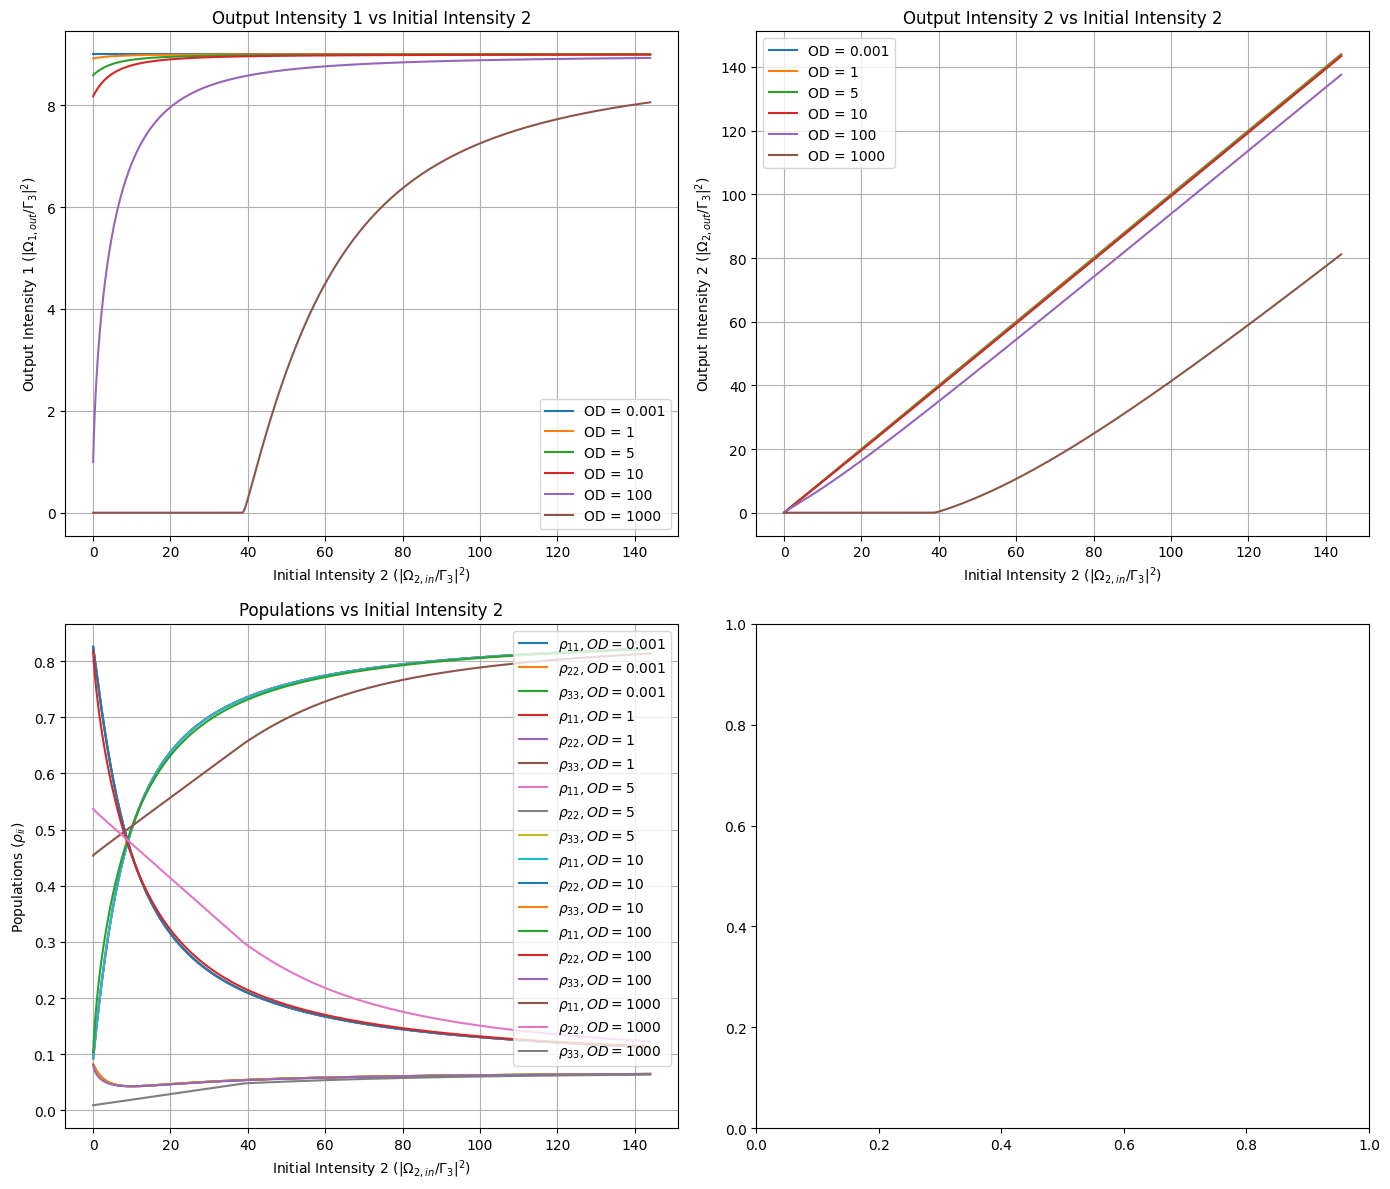

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = mu_23 = 2.5377e-29  # Dipole moment (C·m)

Gamma3 = 2 * np.pi * 6   # Decay rate from level 3 (MHz)
Gamma31 = 5 / 9 * Gamma3   # Decay from level 3 to level 1 (MHz)
Gamma32 = Gamma23 = 4 / 9 * Gamma3   # Decay from level 3 to level 2 (MHz)
Gamma12 = Gamma21 = 0.05 * Gamma3    # Decay rates between levels 1 and 2 (MHz)
gamma13 = (Gamma3 + Gamma12) / 2  # Decoherence rate between levels 1 and 3 (MHz)
gamma23 = (Gamma3 + Gamma21) / 2  # Decoherence rate between levels 2 and 3 (MHz)
gamma12 = (Gamma12 + Gamma21) / 2  # Decoherence rate between ground states (MHz)

w_1 = 2 * np.pi * 3e8 / 795e-9  # Angular frequency (rad/s)
k_0 = w_1 / 3e8  # Wave vector (m^-1)
L = 0.1          # Medium length (m)
z = 0.0005       # Step size in meters

# Function to calculate optical depth and EIT behavior
def calculate_OD_1(Om_1=1.0, delta_1=0.0, delta_2=0.0, OD_0=10):
    Gamma3_in_Hz = Gamma3 * 1e6
    factor = ((4 * np.pi * mu_13**2 * L) / (Gamma3_in_Hz * hbar * epsilon_0 * 795e-9))
    N = OD_0 / factor

    print(f"Optical Depth: {N}")

    n_rabi = 500
    Om_2_list_adapted = np.linspace(0.005, 12, n_rabi, dtype=complex)  # Coupling Rabi frequency range (dimensionless)
    Om_2_list = Om_2_list_adapted * Gamma3
    Om_1_list = np.full(n_rabi, Om_1 * Gamma3, dtype=complex)

    nz = int(L / z)  # Number of z steps
    z_array = np.arange(nz) * z  # Array of z values

    # Initialize arrays to store populations
    rho11_values = np.zeros((nz, n_rabi), dtype=float)
    rho22_values = np.zeros((nz, n_rabi), dtype=float)
    rho33_values = np.zeros((nz, n_rabi), dtype=float)
    rho31_values = np.zeros((nz, n_rabi), dtype=complex)
    rho32_values = np.zeros((nz, n_rabi), dtype=complex)

    for i in range(nz):
        for j in range(len(Om_2_list)):
            Om_2_actual = Om_2_list[j]
            Om_1_actual = Om_1_list[j]
            delta_1_actual = delta_1 * Gamma3
            delta_2_actual = delta_2 * Gamma3

            I = 1j
            # Construct the matrix A
            A = np.array([
                [Gamma31 + Gamma12, 0, I * Om_1_actual / 2, 0, Gamma31 - Gamma21, 0, -I * np.conjugate(Om_1_actual) / 2, 0],
                [0, gamma12 - I * (delta_2_actual - delta_1_actual), I * Om_2_actual / 2, 0, 0, 0, 0, -I * np.conjugate(Om_1_actual) / 2],
                [I * np.conjugate(Om_1_actual), I * np.conjugate(Om_2_actual) / 2, gamma13 + I * delta_1_actual, 0, I * np.conjugate(Om_1_actual) / 2, 0, 0, 0],
                [0, 0, 0, gamma12 + I * (delta_2_actual - delta_1_actual), 0, I * Om_1_actual / 2, -I * np.conjugate(Om_2_actual) / 2, 0],
                [Gamma32 - Gamma12, 0, 0, 0, Gamma32 + Gamma21, I * Om_2_actual / 2, 0, -I * np.conjugate(Om_2_actual) / 2],
                [I * np.conjugate(Om_2_actual) / 2, 0, 0, I * np.conjugate(Om_1_actual) / 2, I * np.conjugate(Om_2_actual), gamma23 + I * delta_2_actual, 0, 0],
                [-I * Om_1_actual, 0, 0, -I * Om_2_actual / 2, -I * Om_1_actual / 2, 0, gamma13 - I * delta_1_actual, 0],
                [-I * Om_2_actual / 2, -I * Om_1_actual / 2, 0, 0, -I * Om_2_actual, 0, 0, gamma23 - I * delta_2_actual]
            ], dtype=complex)

            # Construct the vector b
            b = np.array([
                Gamma31,
                0,
                I * np.conjugate(Om_1_actual) / 2,
                0,
                Gamma32,
                I * np.conjugate(Om_2_actual) / 2,
                -I * Om_1_actual / 2,
                -I * Om_2_actual / 2
            ], dtype=complex)

            try:
                v = np.linalg.solve(A, b)
            except np.linalg.LinAlgError:
                rho11_values[i][j] = np.nan
                rho22_values[i][j] = np.nan
                rho33_values[i][j] = np.nan
                rho31_values[i][j] = np.nan
                rho32_values[i][j] = np.nan
                continue

            # Extract the solutions
            rho11 = np.real(v[0])
            rho12 = v[1]
            rho13 = v[2]
            rho21 = v[3]
            rho22 = np.real(v[4])
            rho23 = v[5]
            rho31 = v[6]
            rho32 = v[7]

            # Compute rho33
            rho33 = 1 - rho11 - rho22

            # Store the populations
            rho11_values[i][j] = np.real(rho11)
            rho22_values[i][j] = np.real(rho22)
            rho33_values[i][j] = np.real(rho33)
            rho31_values[i][j] = rho31
            rho32_values[i][j] = rho32

            # Update the Rabi frequencies
            Om_2_list[j] = Om_2_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho32 * mu_23**2 * 1e-6
            Om_1_list[j] = Om_1_actual + z * (1j) * (k_0 / (epsilon_0 * hbar)) * N * rho31 * mu_13**2 * 1e-6

    return Om_2_list_adapted, Om_2_list, Om_1_list, rho11_values, rho22_values, rho33_values

# Updated plotting function to include populations
def plot_results_with_populations(Om_1, delta_1, delta_2, OD_values):
    fig, ax = plt.subplots(2, 2, figsize=(14, 12))

    for OD_0 in OD_values:
        Om_2_list_adapted, Om_2_list, Om_1_list, rho11_values, rho22_values, rho33_values = calculate_OD_1(Om_1, delta_1, delta_2, OD_0)

        Transparency_Omega_1 = np.abs(Om_1_list)**2 / np.abs(Om_1_list[0])**2
        Transparency_Omega_2 = np.abs(Om_2_list)**2 / np.abs(Om_2_list[0])**2

        Output_Intensity_Omega_1 = Transparency_Omega_1 * np.abs(Om_1_list[0])**2 / (Gamma3**2)
        Output_Intensity_Omega_2 = Transparency_Omega_2 * np.abs(Om_2_list[0])**2 / (Gamma3**2)

        label = f"OD = {OD_0}"

        # Plot Output Intensity of Omega_1 and Omega_2
        ax[0, 0].plot(np.real(Om_2_list_adapted)**2, Output_Intensity_Omega_1, label=label)
        ax[0, 1].plot(np.real(Om_2_list_adapted)**2, Output_Intensity_Omega_2, label=label)

        # Compute average populations along z
        avg_rho11 = np.mean(rho11_values, axis=0)
        avg_rho22 = np.mean(rho22_values, axis=0)
        avg_rho33 = np.mean(rho33_values, axis=0)

        # Plot populations
        ax[1, 0].plot(np.real(Om_2_list_adapted)**2, avg_rho11, label=f"$\\rho_{{11}}, {label}$")
        ax[1, 0].plot(np.real(Om_2_list_adapted)**2, avg_rho22, label=f"$\\rho_{{22}}, {label}$")
        ax[1, 0].plot(np.real(Om_2_list_adapted)**2, avg_rho33, label=f"$\\rho_{{33}}, {label}$")

    # Formatting plots
    ax[0, 0].set_title('Output Intensity 1 vs Initial Intensity 2')
    ax[0, 0].set_xlabel('Initial Intensity 2 ($|\\Omega_{2,in} / \\Gamma_3|^2$)')
    ax[0, 0].set_ylabel('Output Intensity 1 ($|\\Omega_{1,out} / \\Gamma_3|^2$)')
    ax[0, 0].legend(loc='best')
    ax[0, 0].grid(True)

    ax[0, 1].set_title('Output Intensity 2 vs Initial Intensity 2')
    ax[0, 1].set_xlabel('Initial Intensity 2 ($|\\Omega_{2,in} / \\Gamma_3|^2$)')
    ax[0, 1].set_ylabel('Output Intensity 2 ($|\\Omega_{2,out} / \\Gamma_3|^2$)')
    ax[0, 1].legend(loc='best')
    ax[0, 1].grid(True)

    ax[1, 0].set_title('Populations vs Initial Intensity 2')
    ax[1, 0].set_xlabel('Initial Intensity 2 ($|\\Omega_{2,in} / \\Gamma_3|^2$)')
    ax[1, 0].set_ylabel('Populations ($\\rho_{ii}$)')
    ax[1, 0].legend(loc='best')
    ax[1, 0].grid(True)

    plt.tight_layout()
    plt.show()

# Call the function with desired parameters
if __name__ == "__main__":
    Om_1 = 3.0
    delta_1 = 0.0
    delta_2 = 0.0
    OD_values = [0.001, 1, 5, 10, 100, 1000]  # Sweep through OD values
    plot_results_with_populations(Om_1, delta_1, delta_2, OD_values)
